In [51]:
import pandas as pd
import numpy as np

In [52]:
train = pd.read_csv('train.csv')

In [53]:
train_y = train['readmitted'].values
train_x = train.drop(train.columns[-1], axis = 1)

In [54]:
test = pd.read_csv('test.csv')

In [55]:
test_y = test['readmitted'].values
test_x = test.drop(test.columns[-1], axis = 1)

### MLP no class weights

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
import tensorflow as tf
import keras

In [57]:
del(model)
del(model2)

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (51,)),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dropout(rate = 0.4),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dropout(rate = 0.3),
    keras.layers.Dense(1, activation = tf.nn.sigmoid),
])

In [59]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_x, train_y, epochs = 200, batch_size = 64, verbose = 0)
test_loss, test_acc = model.evaluate(test_x, test_y)

537/537 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 0.7662


In [62]:
predictions = model.predict(test_x)
roc_auc = roc_auc_score(test_y, predictions)
precision, recall, thresholds= precision_recall_curve(test_y, predictions)
pr_auc = auc(recall, precision)


537/537 [==============================] - 2s 3ms/step


In [63]:
print('Test accuracy: ', test_acc)
print('ROC-AUC Score: ', roc_auc)
print('PR-AUC: ', pr_auc)

Test accuracy:  0.7662314772605896
ROC-AUC Score:  0.7586608552085063
PR-AUC:  0.6115982501113126


In [66]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 51)                0         
                                                                 
 dense_30 (Dense)            (None, 64)                3328      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-train

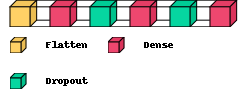

In [41]:
import visualkeras
visualkeras.layered_view(model, legend=True, draw_volume=True,spacing=20)

### MLP including class weights

In [67]:
class_weight = {0:1., 1:2.}

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (51,)),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dropout(rate = 0.4),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dropout(rate = 0.3),
    keras.layers.Dense(1, activation = tf.nn.sigmoid),
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model2.fit(train_x, train_y, epochs = 200, batch_size = 64, class_weight = class_weight, verbose = 0) # include class weights

In [68]:
test_loss2, test_acc2 = model2.evaluate(test_x, test_y)
predictions2 = model2.predict(test_x)
roc_auc2 = roc_auc_score(test_y, predictions2)
precision2, recall2, thresholds2= precision_recall_curve(test_y, predictions2)
pr_auc2 = auc(recall2, precision2)

537/537 [==============================] - 1s 2ms/step


In [69]:
print('Test accuracy: ', test_acc2)
print('ROC-AUC Score: ', roc_auc2)
print('PR-AUC: ', pr_auc2)

Test accuracy:  0.7438512444496155
ROC-AUC Score:  0.7559397682079665
PR-AUC:  0.6088699847321379


In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 51)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                3328      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-traina

In [40]:
# import keras;
# from keras.models import Sequential;
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
# import json;

# network = Sequential();


# def build_cnn_model():
#   model = keras.models.Sequential()

#   model.add(Dense(64, input_shape=(51,)));
#   model.add(Activation('relu'));
#   model.add(Dense(32));
#   model.add(Activation('relu'));
#   model.add(Dense(1));
#   model.add(Activation('sigmoid'));

#   return model

# network = build_cnn_model();

# from ann_visualizer.visualize import ann_viz;

# ann_viz(network, title="", view=True);

# print(network.layers[1].get_config());

{'name': 'activation_21', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}
